# Mini Assignment:

### Build a classification model to predict survival on the Titanic dataset.
### Show confusion matrix and accuracy.
### Add basic visualizations for performance analysis.

Accuracy: 0.7482517482517482
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



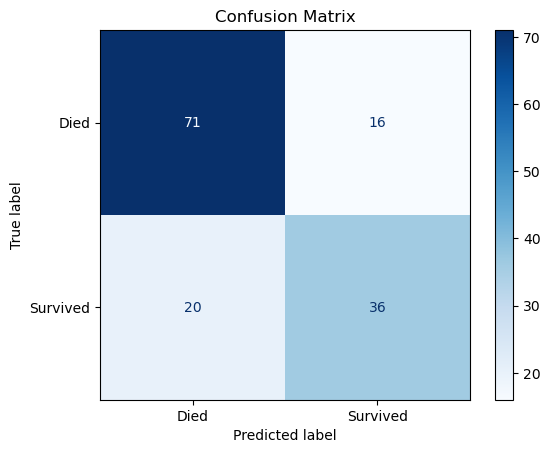

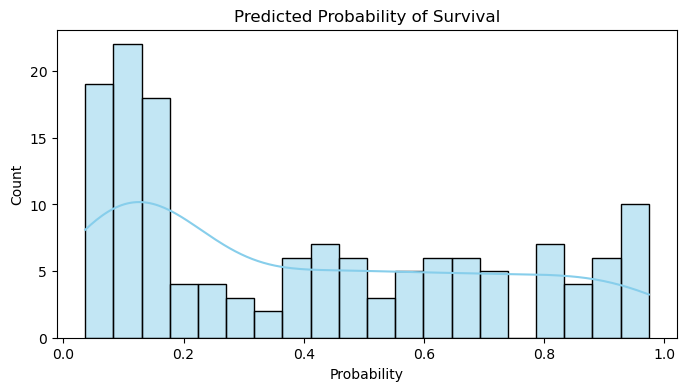

In [3]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 2: Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Step 3: Basic preprocessing
# Drop rows with missing values (simple handling)
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()

# Convert categorical to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Define features and target
X = titanic.drop(columns='survived')
y = titanic['survived']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Visualize prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 4))
sns.histplot(y_prob, bins=20, kde=True, color='skyblue')
plt.title("Predicted Probability of Survival")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()


### ✅ Overall Insight from Titanic Survival Prediction Model

Your logistic regression model for predicting Titanic passenger survival shows that:

- 🧠 **Model Tendency**: The model **leans toward predicting "Died"** more often than "Survived", which is reflected in the **confusion matrix**:
  - ✅ 71 passengers correctly predicted as died.
  - ✅ 36 passengers correctly predicted as survived.
  - ❌ 16 false positives (predicted survived, but actually died).
  - ❌ 20 false negatives (predicted died, but actually survived).

- 📉 **Prediction Confidence**: Based on the **predicted probability distribution**, the model makes **confident predictions** for most passengers:
  - Many probabilities are near **0.1–0.2**, meaning strong belief they will not survive.
  - Fewer predictions fall in the **0.5 (uncertain)** range.
  - Some predictions are close to **1.0**, indicating strong belief in survival.

- ⚠️ **Model Bias Insight**: This behavior suggests a possible **class imbalance**, with the model slightly biased toward predicting non-survival due to more instances of passengers who died in the training data.
